# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!
  
#### Import all the necessary libraries here:


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import median
from scipy import stats
%matplotlib inline

# Challenge 1

#### Read the `employees` dataset
Save your data in a variable called `employees`.

In [5]:
emp=pd.read_csv('Desktop/Employee.csv')
emp.head()

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


#### What's the mean `Salary` by `Department`?
**Tip**: There are 2 ways to do it: with or without pivot tables. Do it both ways. 

In [7]:
emp.groupby('Department').agg({'Salary':'mean'})

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [6]:
emp.pivot_table(index='Department',values='Salary')

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### Now, group the data by more than one column. Use Pandas pivot table function to select the mean `Salary` by `Department` and `Title`.

In [18]:
emp.pivot_table(index=['Department','Title'],values='Salary')

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### Display the number of `Years` of work experience and the `Salary` for each `Title`. Add `Years` as a column in your pivot table.
**Hint**: Use Pandas documentation to explore the [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) function.

In [26]:
emp.pivot_table(index=['Title'],values='Salary',columns='Years')

Years,1,2,3,4,7,8
Title,,,,,,
VP,NaN,NaN,NaN,NaN,NaN,70.0
analyst,35.0,30.0,NaN,35.0,NaN,NaN
associate,NaN,55.0,55.0,NaN,60.0,NaN


#### Find the mean `Salary` and number of employees in each `Department` and for each job `Title`.

In [14]:
emp.pivot_table(index=['Department','Title'],values=['Salary'],aggfunc={'Salary':['mean','count']})

Salary      
                      count  mean
Department Title                 
HR         VP             1  70.0
           analyst        2  32.5
IT         VP             1  70.0
           analyst        2  32.5
           associate      1  60.0
Sales      associate      2  55.0

#### For each `Department` and each job `Title`, find the `Salary` median, minimum, maximum and standard deviation. Comment your results.

In [23]:
emp.pivot_table(index=['Department','Title'],values=['Salary'],aggfunc={'Salary':['median','min','max','std']},fill_value=0)

Salary                     
                        max median min       std
Department Title                                
HR         VP            70   70.0  70  0.000000
           analyst       35   32.5  30  3.535534
IT         VP            70   70.0  70  0.000000
           analyst       35   32.5  30  3.535534
           associate     60   60.0  60  0.000000
Sales      associate     55   55.0  55  0.000000

In [ ]:
"""
your commments here
"""

#### Based on your comments, fill the missing values with an appropriate value.

In [ ]:
# your code here

#### The stake holders want to know, for each `Department`, the number of employees and how much money is spent on salaries. Could you provide that information? 

In [19]:
emp.pivot_table(index=['Department'],values=['Salary'],aggfunc={'Salary':['sum','count']})

Salary     
            count  sum
Department            
HR              3  135
IT              4  195
Sales           2  110

#### For each `Department` and `Title`, find the the total years of work experience and the mean `Salary`.

In [22]:
emp.pivot_table(index=['Department','Title'],values=['Salary','Years'],aggfunc={'Salary':['mean'],'Years':'sum'})

Salary Years
                       mean   sum
Department Title                 
HR         VP          70.0     8
           analyst     32.5     6
IT         VP          70.0     8
           analyst     32.5     3
           associate   60.0     7
Sales      associate   55.0     5

## Bonus Challenge 1

#### Compute the mean `Salary` after removing the maximum `Salary` for each `Department`. Create the appropriate pivot table.
**Hint**: Write a custom function.

In [74]:
emp.pivot_table(index=['Department'],values=['Salary'],aggfunc={'Salary':['max']})
emp1=emp
emp1.drop(emp1.loc[ep1.Department=='HR'].index,inplace=True)


,Salary
,max
Department,
HR,70
IT,70
Sales,55


In [80]:
emp1.drop(emp1.loc[(emp1.Department=='HR')&(emp1.Salary==70)].index,inplace=True)
emp1.drop(emp1.loc[(emp1.Department=='IT')&(emp1.Salary==70)].index,inplace=True)
emp1.drop(emp1.loc[(emp1.Department=='Sales')&(emp1.Salary==55)].index,inplace=True)
emp1.pivot_table(index='Department',values='Salary')

,Salary
Department,
HR,32.500000
IT,41.666667


# Challenge 2

#### Read the `fitbit` dataset 
Save your data in a variable called `fitbit`.

In [82]:
fb=pd.read_csv('Desktop/fitbit.csv')
fb.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


#### Explore you dataset in terms of data types and descriptive statistics.
**Hint**: Use Pandas functions from previous lectures.

In [86]:
fb.describe()


,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


In [87]:
fb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    367 non-null    object 
 1   Calorie burned          367 non-null    int64  
 2   Steps                   367 non-null    int64  
 3   Distance                367 non-null    float64
 4   Floors                  367 non-null    int64  
 5   Minutes Sedentary       367 non-null    float64
 6   Minutes Lightly Active  367 non-null    int64  
 7   Minutes Fairly Active   367 non-null    int64  
 8   Minutes Very Active     367 non-null    int64  
 9   Activity Calories       367 non-null    int64  
 10  MinutesOfSleep          367 non-null    int64  
 11  MinutesOfBeingAwake     367 non-null    int64  
 12  NumberOfAwakings        367 non-null    int64  
 13  LengthOfRestInMinutes   367 non-null    int64  
dtypes: float64(2), int64(11), object(1)
memory

#### You suspect that there must be a linear relationship between the `Minutes Very Active` and the `Steps`. Compute the correlation between these variables.

In [93]:
fb1=fb[['Minutes Very Active','Steps']]
fb1.corr()

,Minutes Very Active,Steps
Minutes Very Active,1.000000,0.571452
Steps,0.571452,1.000000


#### Use matplotlib to visually plot `Minutes Very active` vs `Steps`. We'll work with matplotlib next week. As a first introduction, uncomment and complete the following code. You need to replace the # symbol for the correct function arguments. 

In [ ]:
import matplotlib.pyplot as plt;

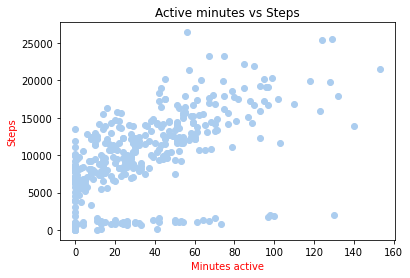

In [104]:

plt.scatter(fb['Minutes Very Active'],fb['Steps'],color='#abcdef')
plt.title('Active minutes vs Steps',fontweight=60,fontsize=12)
plt.xlabel('Minutes active',fontweight=60,fontsize=10,color='r')
plt.ylabel('Steps',fontweight=60,fontsize=10,color='r')
plt.show()


#### What can you say about `Minutes Very Active` and `Steps`? Write a comment below.

In [ ]:
"""
Steps tend to increase as the active time increases
"""

#### We also suspect that there must be a linear relationship between the `Minutes Sedentary` and the `Steps`. Compute the correlation between these variables.

In [105]:
fb1=fb[['Minutes Sedentary','Steps']]
fb1.corr()

,Minutes Sedentary,Steps
Minutes Sedentary,1.000000,0.076906
Steps,0.076906,1.000000


#### Use matplotlib to visually plot `Minutes Sedentary` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

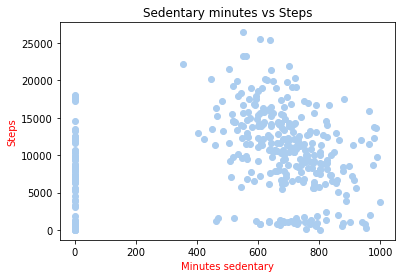

In [106]:
plt.scatter(fb['Minutes Sedentary'],fb['Steps'],color='#abcdef')
plt.title('Sedentary minutes vs Steps',fontweight=60,fontsize=12)
plt.xlabel('Minutes sedentary',fontweight=60,fontsize=10,color='r')
plt.ylabel('Steps',fontweight=60,fontsize=10,color='r')
plt.show()

In [ ]:
"""
there seems little correlation between sedentary minutes and steps
"""

#### We also suspect that there must be a linear relationship between the `MinutesOfSleep` and the `Steps`. Compute the correlation between these variables.

In [107]:
fb1=fb[['MinutesOfSleep','Steps']]
fb1.corr()

,MinutesOfSleep,Steps
MinutesOfSleep,1.000000,0.130986
Steps,0.130986,1.000000


#### Use matplotlib to visually plot `MinutesOfSleep` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

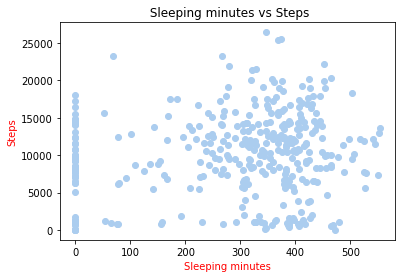

In [108]:
plt.scatter(fb['MinutesOfSleep'],fb['Steps'],color='#abcdef')
plt.title(' Sleeping minutes vs Steps',fontweight=60,fontsize=12)
plt.xlabel('Sleeping minutes',fontweight=60,fontsize=10,color='r')
plt.ylabel('Steps',fontweight=60,fontsize=10,color='r')
plt.show()

In [ ]:
"""
your commments here
"""

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`.

In [109]:
columns = ['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']

<AxesSubplot:>

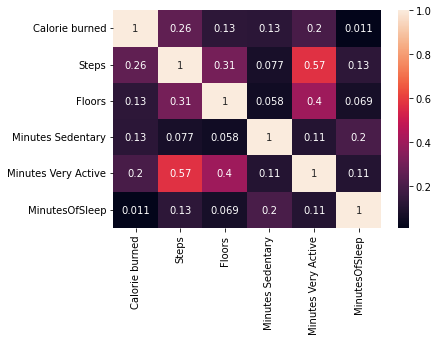

In [113]:
fb1=fb[columns]
sns.heatmap(fb1.corr(),annot=True,cbar=True)

#### Based on the result of the correlation matrix, which of the features are highly correlated with variable `Steps`?
**Hint**: sort the correlations of `Steps` vs the rest of the features in descending order. You can use Pandas `sort_values`. 

<AxesSubplot:>

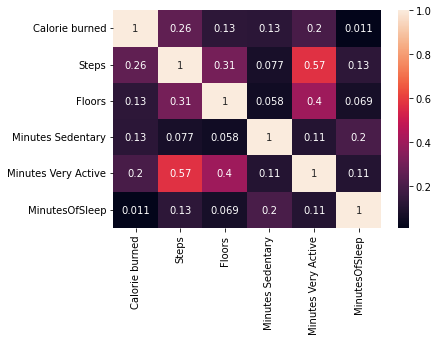

In [114]:
fb1=fb[columns]
sns.heatmap(fb1.corr(),annot=True,cbar=True)
print('steps seems to have a strong correlation with minutes very active and floors')


In [119]:
a=pd.DataFrame(fb1.corr()['Steps'].sort_values(ascending=False))
a

,Steps
Steps,1.000000
Minutes Very Active,0.571452
Floors,0.306511
Calorie burned,0.255305
MinutesOfSleep,0.130986
Minutes Sedentary,0.076906


# Challenge 3

#### Read the `time_grades` dataset from Ironhack's database:
* db: `time_grades`
* table: `time_grades`

Save your data in a variable called `time_grades`.

In [121]:
df=pd.read_csv('Desktop/Time_Grades.csv')
df.head()

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9


#### Show visually the frequency distribution of the `time_grades` dataset.

Text(0, 0.5, 'Count study time')

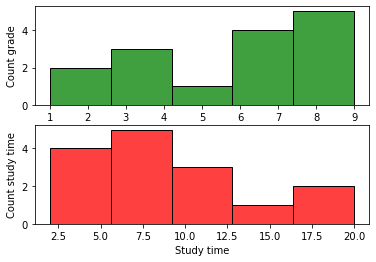

In [133]:
fig,[ax1,ax2]=plt.subplots(2,1)
sns.histplot(df['Grade'],ax=ax1,color='green')
sns.histplot(df['Study time'],ax=ax2,color='r')
ax1.set_ylabel('Count grade')
ax2.set_ylabel('Count study time')



#### Is there a correlation between `Study time` and `Grade`? Use both Pearson and Spearman correlations and comment your results.

In [134]:
df.corr()

,Study time,Grade
Study time,1.000000,0.798046
Grade,0.798046,1.000000


In [ ]:
"""
yes, it seems that study time and grades are strongly correlated
"""

#### Use matplotlib to visually plot `Study time` vs `Grade`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

as study time increases, the grades seem to increase


C:\Users\Kareem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


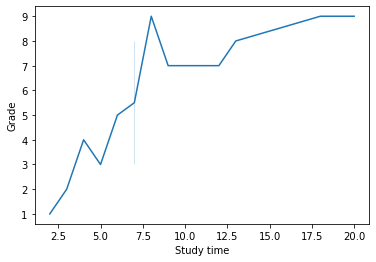

In [142]:
sns.lineplot('Study time','Grade',data=df)
print('as study time increases, the grades seem to increase')


In [ ]:
"""
your commments here
"""

#### Could you explain the difference between Pearson and Spearman correlations?

In [143]:
"""
Pearson correlation: Pearson correlation evaluates the linear relationship between two continuous variables. Spearman correlation: Spearman correlation evaluates the monotonic relationship.
"""

'\nPearson correlation: Pearson correlation evaluates the linear relationship between two continuous variables. Spearman correlation: Spearman correlation evaluates the monotonic relationship.\n'